**K-Means - Examine performance in the ideal case**

This is achieved by the following steps:
* Generate sample dataset using *make_blobs* with the properties below:
 * Clusters are well-separated 
 * Clusters have similar variance
 * Clusters have isotropic/spherical variance
* Run KMeans on this dataset
* Examine classification metrics to determine 'goodness' of classification


**Other TODO:**
* Similar cluster size violation - Unequal spherical cluster size - 1 small cluster with low variance, 1 large cluster with high variance
* Similar cluster size violation - Unequal spherical cluster size - Mickey mouse clusters (https://en.wikipedia.org/wiki/K-means_clustering#/media/File:ClusterAnalysis_Mouse.svg)
* Isotropic variance violation - Elongated (non-spherical) clusters
* Isotropic variance violation - 2 half-moons 
* Well-separated clusters violtion - Uniform data

In [10]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

print 'sklearn version = {}'.format(sklearn.__version__)


sklearn version = 0.18


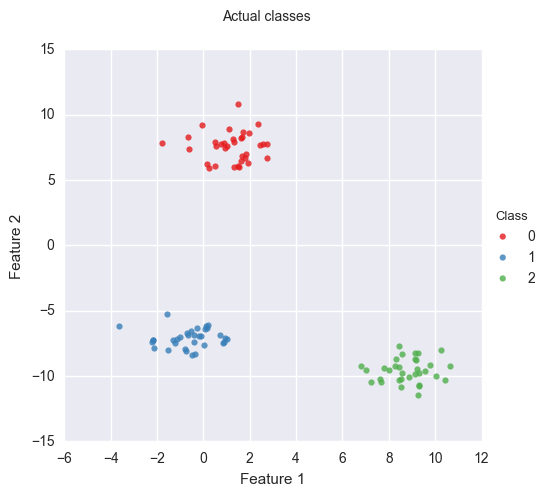

In [11]:
# ----------
# Generate sample dataset for clustering

X, actual_classes = make_blobs(n_samples=100, n_features=2, centers=3, random_state=13112016)
df = pd.DataFrame({
        'Feature 1':X[:,0],
        'Feature 2':X[:,1],
        'Class': actual_classes
    })
df = df.round(2)

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df, hue='Class', palette='Set1', fit_reg=False)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Actual classes')


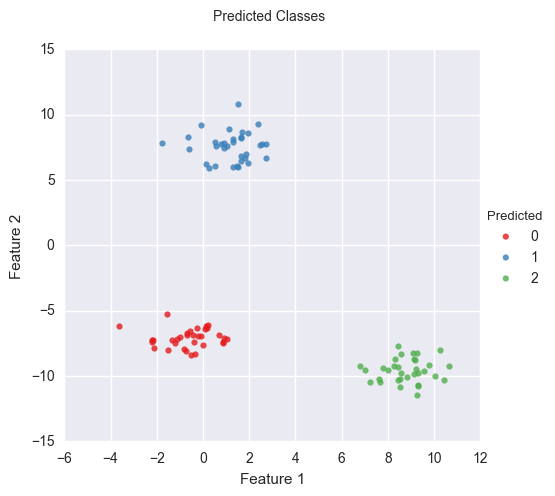

In [12]:
k_train = KMeans(n_clusters=3).fit(X)
predicted_classes = k_train.labels_

df2 = pd.DataFrame({
        'Feature 1':df['Feature 1'], 
        'Feature 2':df['Feature 2'], 
        'Actual':actual_classes, 
        'Predicted':predicted_classes
    })

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df2, hue='Predicted', palette='Set1', fit_reg=False)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Predicted Classes')